In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [86]:
stocks_tesla =  pd.read_csv('C:\\Users\\yss06\\Desktop\\python\\stock\\GHproject\\GH project - py\\sejun\\TSLA.csv', header=0, encoding="utf-8-sig")
stocks_tesla



,Date,Open,High,Low,Close,Adj Close,Volume
0,8/30/2018,20.150667,20.306667,19.848000,20.209999,20.209999,108250500
1,8/31/2018,20.133333,20.354000,19.906668,20.110666,20.110666,80626500
2,9/4/2018,19.796000,19.879333,19.200001,19.263332,19.263332,125257500
3,9/5/2018,19.003332,19.118668,18.478666,18.716000,18.716000,115812000
4,9/6/2018,18.986668,19.411333,18.591999,18.730000,18.730000,112212000
...,...,...,...,...,...,...,...
1252,8/23/2023,229.339996,238.979996,229.289993,236.860001,236.860001,101077600
1253,8/24/2023,238.660004,238.919998,228.179993,230.039993,230.039993,99777400
1254,8/25/2023,231.309998,239.000000,230.350006,238.589996,238.589996,106345900
1255,8/28/2023,242.580002,244.380005,235.350006,238.820007,238.820007,107673700


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

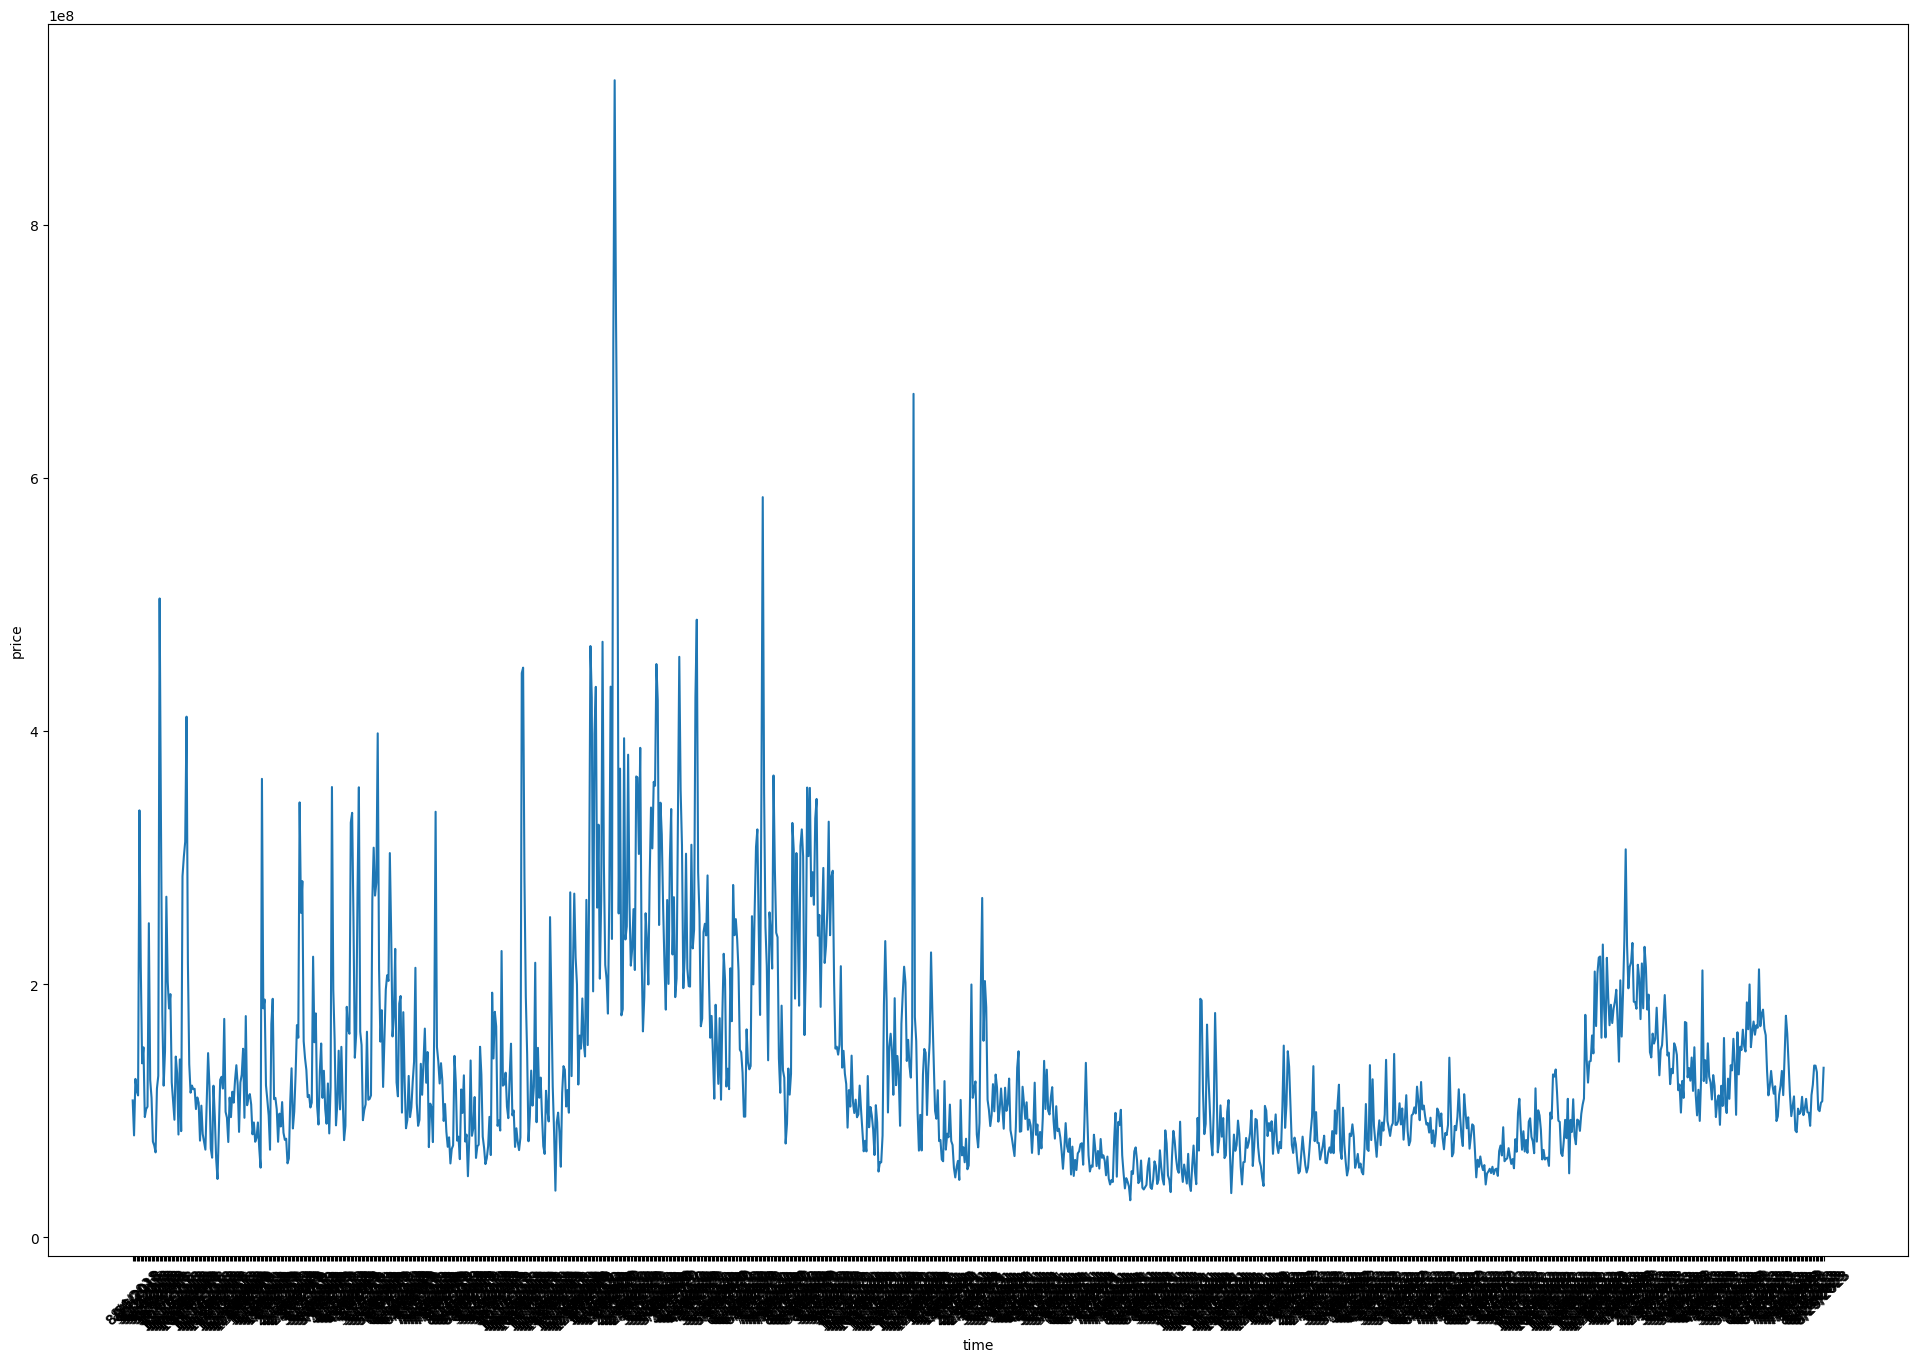

In [87]:
plt.figure(figsize=(24, 16))
sns.lineplot(y=stocks_tesla['Volume'], x=stocks_tesla['Date'])
plt.xlabel('time')
plt.ylabel('price')
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

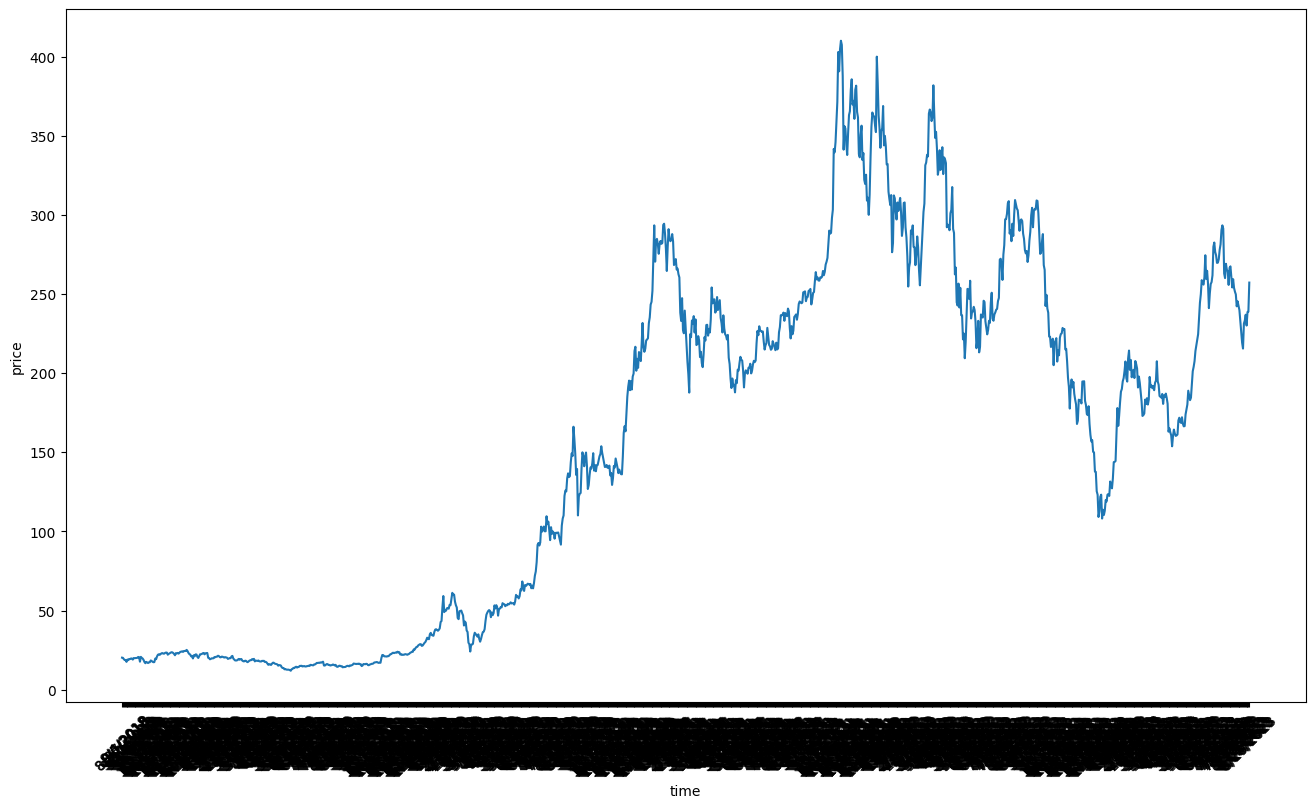

In [88]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stocks_tesla['Adj Close'], x=stocks_tesla['Date'])
plt.xlabel('time')
plt.ylabel('price')
plt.xticks(rotation=45)

In [89]:
stocks_tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,156.068584,159.652094,152.188131,156.016478,156.016478,1.352826e+08
std,112.626454,115.106564,109.817599,112.470960,112.470960,8.767400e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,23.756001,24.379999,23.466667,23.892668,23.892668,7.913400e+07
50%,178.050003,183.619995,175.330002,180.130005,180.130005,1.087860e+08
75%,244.853333,250.516663,239.696671,244.666672,244.666672,1.623843e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [90]:
stocks_tesla.isnull().sum()
# stocks_tesla.loc[stocks_tesla['Open'].isna()]

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [91]:
# Feature Scaling

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_cols = ['Open','High','Low','Close','Adj Close','Volume'] #  정규화 대상 column 정의

scaled_df = scaler.fit_transform(stocks_tesla[scale_cols]) # 정규화 수행 by using scaler.fit_transform


#만약 결과 값들을 numpy로 만들지 않고 새로운 dataframe으로 만들고 싶다면 
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols) # 를 이용 <- 정규화된 새로운 DataFrame 생성
print(scaled_df)

          Open      High       Low     Close  Adj Close    Volume
0    -1.207283 -1.211059 -1.205570 -1.207961  -1.207961 -0.308448
1    -1.207437 -1.210648 -1.205036 -1.208845  -1.208845 -0.623649
2    -1.210433 -1.214773 -1.211473 -1.216381  -1.216381 -0.114390
3    -1.217474 -1.221384 -1.218044 -1.221250  -1.221250 -0.222168
4    -1.217622 -1.218841 -1.217012 -1.221125  -1.221125 -0.263245
...        ...       ...       ...       ...        ...       ...
1252  0.650829  0.689444  0.702370  0.719081   0.719081 -0.390293
1253  0.733614  0.688922  0.692258  0.658419   0.658419 -0.405129
1254  0.668328  0.689617  0.712026  0.734469   0.734469 -0.330180
1255  0.768433  0.736375  0.757574  0.736514   0.736514 -0.315029
1256  0.732903  0.850228  0.779619  0.899821   0.899821 -0.014092

[1257 rows x 6 columns]


In [92]:
# 딥러닝 학습을 위한 입력데이터 Feature Column, 정답데이터, label column을 정의 한후에 numpy 로 변환하여 데이터 전처리 과정 완료
feature_cols = ['Open','High','Low','Close','Adj Close','Volume'] # feature 정의 (입력 데이터)
label_cols = ['Adj Close'] # Label 정의 (정답데이터)

label_df = pd.DataFrame(scaled_df, columns=label_cols)
feature_df = pd.DataFrame(scaled_df, columns=feature_cols)

print(feature_df)
print(label_df)

          Open      High       Low     Close  Adj Close    Volume
0    -1.207283 -1.211059 -1.205570 -1.207961  -1.207961 -0.308448
1    -1.207437 -1.210648 -1.205036 -1.208845  -1.208845 -0.623649
2    -1.210433 -1.214773 -1.211473 -1.216381  -1.216381 -0.114390
3    -1.217474 -1.221384 -1.218044 -1.221250  -1.221250 -0.222168
4    -1.217622 -1.218841 -1.217012 -1.221125  -1.221125 -0.263245
...        ...       ...       ...       ...        ...       ...
1252  0.650829  0.689444  0.702370  0.719081   0.719081 -0.390293
1253  0.733614  0.688922  0.692258  0.658419   0.658419 -0.405129
1254  0.668328  0.689617  0.712026  0.734469   0.734469 -0.330180
1255  0.768433  0.736375  0.757574  0.736514   0.736514 -0.315029
1256  0.732903  0.850228  0.779619  0.899821   0.899821 -0.014092

[1257 rows x 6 columns]
      Adj Close
0     -1.207961
1     -1.208845
2     -1.216381
3     -1.221250
4     -1.221125
...         ...
1252   0.719081
1253   0.658419
1254   0.734469
1255   0.736514
1256   

In [93]:
label_np=label_df.to_numpy() # 딥러닝 학습을 위해 DataFrame -> Numpy 변환
feature_np = feature_df.to_numpy() # 딥러닝 학습을 위해 DataFrame -> Numpy 변환

In [94]:
# 학습 데이터 생성 - 입력데이터 feautre 와 정답 데이터 label 

window_size = 40
def make_sequence_dataset(feature, label, window_size):

    feature_list = [] # 생성될 feature list
    label_list = [] # 생성될 label list

    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size]) # feature[i:i+window_size] 슬라이싱? 하여 feature를 생성
        label_list.append(label[i+window_size]) # label[i:i+window_size] 슬라이싱? 하여 label 생성 
    return np.array(feature_list),np.array(label_list) # 3차원으로 만들어줘야한다 -> (batch size, time steps, input dimensions) LSTM 필수조건





In [95]:
X, Y = make_sequence_dataset(feature_np, label_np, window_size) # numpy로 주어진 시계열 데이터 feature_np와 label_np를 window size에 맞게 입력데이터 X와 출력 데이터 Y를 생성한다. 
print(X.shape, Y.shape)

(1217, 40, 6) (1217, 1)


In [96]:
## 데이터 분리 및 모델구축
# 1. train set과 test set 구분
x_train = X[0:800]
y_train = Y[0:800]

x_test = X[800:]
y_test = Y[800:]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(800, 40, 6) (800, 1)
(417, 40, 6) (417, 1)


In [97]:
## LSTM 모델 구축
model = Sequential()

model.add(LSTM(128, activation = 'tanh',input_shape=x_train[0].shape))

model.add(Dense(1,activation='linear'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               69120     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69249 (270.50 KB)
Trainable params: 69249 (270.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
## 모델 Compile - 손실함수 계산

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience = 5, mode = 'min') # 모니터에 val_loss 말고 다른거 없는지 

model.fit(x_train, y_train, epochs = 100, batch_size = 32, callbacks=early_stop)

Epoch 1/100
25/25 [==============================] - 2s 19ms/step - loss: 2.6537e-04
Epoch 2/100
25/25 [==============================] - 0s 20ms/step - loss: 2.3271e-04
Epoch 3/100
25/25 [==============================] - 0s 19ms/step - loss: 2.2907e-04
Epoch 4/100
25/25 [==============================] - 0s 19ms/step - loss: 1.9591e-04
Epoch 5/100
25/25 [==============================] - 0s 19ms/step - loss: 1.7952e-04
Epoch 6/100
25/25 [==============================] - 1s 21ms/step - loss: 1.4517e-04
Epoch 7/100
25/25 [==============================] - 0s 19ms/step - loss: 1.4239e-04
Epoch 8/100
25/25 [==============================] - 0s 19ms/step - loss: 1.6522e-04
Epoch 9/100
25/25 [==============================] - 0s 19ms/step - loss: 1.4332e-04
Epoch 10/100
25/25 [==============================] - 1s 20ms/step - loss: 1.4274e-04
Epoch 11/100
 4/25 [===>..........................] - ETA: 0s - loss: 1.9613e-04

KeyboardInterrupt: 

14/14 [==============================] - 1s 8ms/step
[[ 1.7168624 ]
 [ 1.6536894 ]
 [ 1.9547745 ]
 [ 1.8613166 ]
 [ 1.785144  ]
 [ 1.7233521 ]
 [ 1.7016469 ]
 [ 1.7565072 ]
 [ 1.8111683 ]
 [ 1.8922242 ]
 [ 1.7566792 ]
 [ 1.7827884 ]
 [ 1.7530576 ]
 [ 1.677795  ]
 [ 1.670432  ]
 [ 1.5476688 ]
 [ 1.4878865 ]
 [ 1.5287437 ]
 [ 1.5480934 ]
 [ 1.3193268 ]
 [ 1.3256241 ]
 [ 1.5165297 ]
 [ 1.484157  ]
 [ 1.4097058 ]
 [ 1.31577   ]
 [ 1.3290553 ]
 [ 1.2783579 ]
 [ 1.2571977 ]
 [ 1.2706579 ]
 [ 1.2152427 ]
 [ 1.1503569 ]
 [ 1.1869247 ]
 [ 1.288856  ]
 [ 1.3052146 ]
 [ 1.2371873 ]
 [ 1.1939116 ]
 [ 1.1279497 ]
 [ 1.0368198 ]
 [ 1.051716  ]
 [ 1.1065329 ]
 [ 1.2114979 ]
 [ 1.2237064 ]
 [ 1.2409464 ]
 [ 1.1693782 ]
 [ 1.1238158 ]
 [ 1.0457163 ]
 [ 1.0258383 ]
 [ 1.0713795 ]
 [ 1.0218934 ]
 [ 0.9546273 ]
 [ 0.88882387]
 [ 0.92958724]
 [ 1.0198435 ]
 [ 1.110516  ]
 [ 1.2329768 ]
 [ 1.3473732 ]
 [ 1.5486606 ]
 [ 1.6615841 ]
 [ 1.7446806 ]
 [ 1.7715279 ]
 [ 1.9308698 ]
 [ 1.9561285 ]
 [ 1.9250464 ]
 [

C:\Users\yss06\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yss06\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


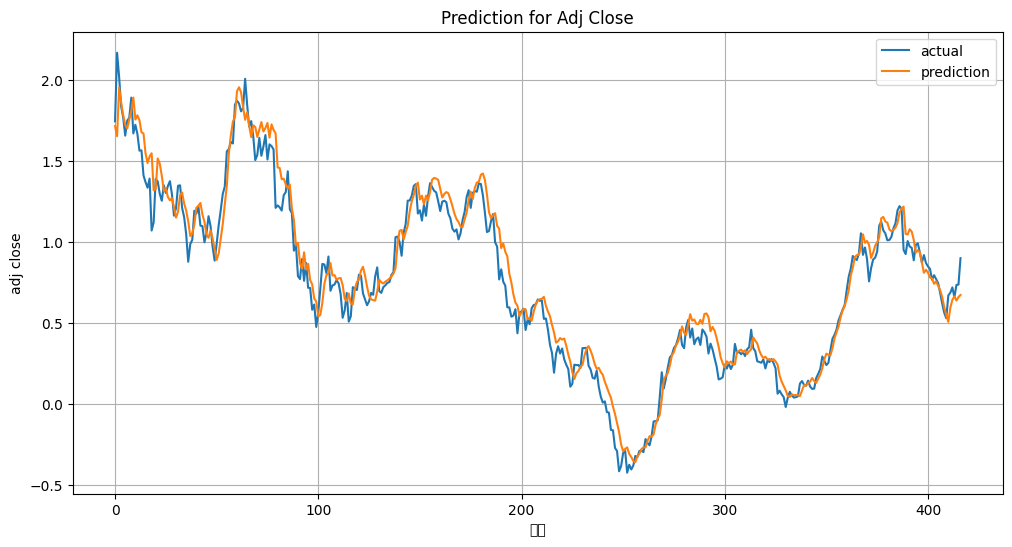

In [99]:
# 테슬라 주가 예측

pred = model.predict(x_test)

print(pred)

plt.figure(figsize=(12,6))
plt.title('Prediction for Adj Close')
plt.ylabel('adj close')
plt.xlabel('기간')
plt.plot(y_test,label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 예측 성능 지표 계산
mape = mean_absolute_percentage_error(y_test, pred)
r2 = r2_score(y_test, pred)

# 지표 출력
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared: {r2:.4f}")






Mean Absolute Error (MAE): 0.0855
Mean Squared Error (MSE): 0.0128
Root Mean Squared Error (RMSE): 0.1131
Mean Absolute Percentage Error (MAPE): 29.26%
R-squared: 0.9555


In [101]:
# Extracting the dates corresponding to the test data
test_dates = stocks_tesla['Date'].iloc[800 + window_size:].reset_index(drop=True)

# Creating a DataFrame with test dates and predicted values
prediction_df = pd.DataFrame({
    'Date': test_dates,
    'Predicted Adj Close': pred.flatten()  # Flattening the predictions to match the shape
})

print(prediction_df)  # Displaying the top rows of the prediction DataFrame


file_path = "C:\\Users\\yss06\\Desktop\\python\\pred.csv"
prediction_df.to_csv(file_path, index=False)


           Date  Predicted Adj Close
0    12/31/2021             1.716862
1      1/3/2022             1.653689
2      1/4/2022             1.954774
3      1/5/2022             1.861317
4      1/6/2022             1.785144
..          ...                  ...
412   8/23/2023             0.642604
413   8/24/2023             0.663880
414   8/25/2023             0.638068
415   8/28/2023             0.659072
416   8/29/2023             0.672296

[417 rows x 2 columns]


In [102]:
# Create a new scaler for the 'Adj Close' column only
adj_close_scaler = MinMaxScaler()


adj_close_scaler.min_, adj_close_scaler.scale_ = scaler.min_[-2], scaler.scale_[-2]  # Extracting the scaling info for 'Adj Close'

# Inverse transform the normalized predictions using the new scaler
original_predictions = adj_close_scaler.inverse_transform(normalized_predictions)

# Add the original predictions to the DataFrame
prediction_df['Original Predicted Adj Close'] = original_predictions

print(prediction_df)# Displaying the top rows of the prediction DataFrame with original values


AttributeError: 'StandardScaler' object has no attribute 'min_'